- 处理多 Sheet 的 Excel 文件

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **a) 读取 Excel 文件的所有 Sheets**
file_path = "data/riket2023_åk9_np.xlsx"  # 替换为你的文件路径
sheets = pd.ExcelFile(file_path)  # 读取 Excel 文件
sheet_names = sheets.sheet_names  # 获取所有 sheet 名称

# 用于存储所有科目的数据的字典
df_data = {}

# 遍历每个 sheet 并读取数据到字典中
for sheet_name in sheet_names:
    df_data[sheet_name] = sheets.parse(sheet_name, skiprows=8)
    # parse(sheet) 是将一个 Excel 文件中的某个 sheet 读取为 Pandas 的 DataFrame，并存储在一个字典中。并跳过前8行

df_data.keys()

# # kokchun
# national_test_file_path = "data/riket2023_åk9_np.xlsx"
# sheet_names = pd.ExcelFile(national_test_file_path).sheet_names
# # iterate through sheet names
# # read each sheet into a dictionary of dataframes
# df_dict = {}
# for sheet_name in sheet_names[:-1]:
#     df_dict[sheet_name] = pd.read_excel(
#         national_test_file_path, skiprows=8, sheet_name=sheet_name
#     )

dict_keys(['Engelska', 'Matematik', 'Svenska', 'Svenska som andraspråk', 'Rapportbeskrivning och def.'])

In [14]:
df_data["Matematik"]

**b) 统一重命名列名称**

In [7]:

new_column_names = [
    "Plats",
    "Huvudman",
    "Totalt (A-F)",
    "Flickor (A-F)",
    "Pojkar (A-F)",
    "Totalt (A-E)",
    "Flickor (A-E)",
    "Pojkar (A-E)",
    "Totalt (poäng)",
    "Flickor (poäng)",
    "Pojkar (poäng)",
]

In [36]:
# 重命名每个科目数据的列（除了最后一列）
new_sheet_names = sheet_names[:-1]
for sheet in new_sheet_names:
    df_data[sheet].columns = new_column_names

# 打印数学数据
df_math = df_data["Matematik"]
df_math

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


 kokchun    

df_dict["Engelska"].columns
import numpy as np

postfixes = [""]*2 + [" (A-F)"]*3 + [" (A-E)"]*3 + [" (poäng)"]*3
#postfixes 通常是 pandas 中用于处理 DataFrame 合并（merge/join）或拼接（concat） 时的一个参数。
np.array(postfixes)
 
df_dict["Engelska"].columns + np.array(postfixes)

from copy import deepcopy

df_dict_cleaned = deepcopy(df_dict)
#深拷贝确保对 df_dict_cleaned 的修改不会影响到原始的 df_dict

for subject in subjects:
    new_columns = df_dict_cleaned[subject].columns.str.strip() + np.array(postfixes)
    df_dict_cleaned[subject].columns = new_columns
    df_dict_cleaned[subject] = df_dict_cleaned[subject].rename(
        {"Riket": "Plats", "Typ av huvudman": "Huvudman"}, axis=1
    )
df_dict_cleaned["Matematik"]

**c) 初步探索性数据分析 (EDA)**

In [21]:
# 以数学数据为例
print("\n数学数据的基本信息:")
print(df_math.info())

print("\n数学数据的统计摘要:")
print(df_math.describe())

print("\n数学数据中 'Huvudman' 列的值计数:")
print(df_math["Huvudman"].value_counts())


数学数据的基本信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Plats            4 non-null      object 
 1   Huvudman         4 non-null      object 
 2   Totalt (A-F)     4 non-null      int64  
 3   Flickor (A-F)    4 non-null      int64  
 4   Pojkar (A-F)     4 non-null      int64  
 5   Totalt (A-E)     4 non-null      object 
 6   Flickor (A-E)    4 non-null      object 
 7   Pojkar (A-E)     4 non-null      object 
 8   Totalt (poäng)   4 non-null      float64
 9   Flickor (poäng)  4 non-null      float64
 10  Pojkar (poäng)   4 non-null      float64
dtypes: float64(3), int64(3), object(5)
memory usage: 484.0+ bytes
None

数学数据的统计摘要:
        Totalt (A-F)  Flickor (A-F)  Pojkar (A-F)  Totalt (poäng)  \
count       4.000000       4.000000       4.00000        4.000000   
mean    53383.000000   25774.000000   27609.00000       12.650000  

In [23]:
df_math.describe().transpose()

# describe() 的输出转置，使行变为列，列变为行

,count,mean,std,min,25%,50%,75%,max
Totalt (A-F),4.0,53383.000,50305.900509,50.0,16927.250,53358.00,89813.750,106766.0
Flickor (A-F),4.0,25774.000,24187.203159,25.0,8359.000,25761.50,43176.500,51548.0
Pojkar (A-F),4.0,27609.000,26119.924770,25.0,8568.250,27596.50,46637.250,55218.0
Totalt (poäng),4.0,12.650,1.138713,11.6,11.825,12.45,13.275,14.1
Flickor (poäng),4.0,12.400,0.920145,11.5,11.725,12.30,12.975,13.5
Pojkar (poäng),4.0,12.875,1.357387,11.7,11.925,12.55,13.500,14.7


In [24]:
df_math[["Huvudman","Totalt (poäng)"]]

,Huvudman,Totalt (poäng)
0,Samtliga,11.9
1,Kommunal,11.6
2,Enskild,13.0
3,Skolverket,14.1


**d) 计算数学中获得 F 的学生人数**

In [37]:
# 去掉最后一行 有～ 不加入计算
df_math = df_math[:-1]

In [38]:
# df_math["F Students"] = df_math["Totalt (A-F)"] - df_math["Totalt (A-E)"]  # 计算获得 F 的总人数
# df_math["F Girls"] = df_math["Flickor (A-F)"] - df_math["Flickor (A-E)"]  # 女生
# df_math["F Boys"] = df_math["Pojkar (A-F)"] - df_math["Pojkar (A-E)"]  # 男生

# 计算 got_f, 新加一列
df_math["got_f"] = ((100 - df_math["Totalt (A-E)"]) / 100 * df_math["Totalt (A-F)"]).astype(int)

for index, row in df_math.iterrows():
    huvudman = row["Huvudman"]
    got_f = row["got_f"]
    print(f"Typ av huvudman {huvudman} The amount of students that got F in mathematics is {got_f}")


Typ av huvudman Samtliga The amount of students that got F in mathematics is 11637
Typ av huvudman Kommunal The amount of students that got F in mathematics is 10015
Typ av huvudman Enskild The amount of students that got F in mathematics is 1601


/var/folders/gn/2sqcwh556yv91y24xm14ldsc0000gn/T/ipykernel_31015/1994390608.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_math["got_f"] = ((100 - df_math["Totalt (A-E)"]) / 100 * df_math["Totalt (A-F)"]).astype(int)


#kokchun

import duckdb

total_students = duckdb.query(
    """
    SELECT "Totalt (A-F)"
    FROM df_math
    WHERE huvudman = 'Samtliga'
"""
).df().values[0][0]

total_students

students_passed = df_math.query("Huvudman == 'Samtliga'")["Totalt (A-E)"]*.01*total_students

students_passed
students_failed = total_students - students_passed
students_failed[0]

**e) 绘制各科目的总分柱状图**

In [41]:
df_data["Engelska"]

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,106941,51864,55077,97.0,97.1,97.0,15.7,15.8,15.7
1,Riket,Kommunal,84310,40675,43635,96.6,96.6,96.6,15.4,15.5,15.4
2,Riket,Enskild,22582,11165,11417,98.7,98.8,98.7,16.9,17.0,16.8
3,Riket,Skolverket,49,24,25,100.0,100.0,100.0,18.5,18.9,18.2


In [59]:
# 去掉最后一个sheet：Rapportbeskrivning och def.

df_data = {sheet: df_data[sheet] for sheet in sheet_names[:-1]}
df_data["Engelska"]

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,106941,51864,55077,97.0,97.1,97.0,15.7,15.8,15.7
1,Riket,Kommunal,84310,40675,43635,96.6,96.6,96.6,15.4,15.5,15.4
2,Riket,Enskild,22582,11165,11417,98.7,98.8,98.7,16.9,17.0,16.8
3,Riket,Skolverket,49,24,25,100.0,100.0,100.0,18.5,18.9,18.2


In [63]:
# 汇总各科目的总分
total_points = {
    subject: data["Totalt (poäng)"].iloc[0] for subject, data in df_data.items()
}
# 转换为 DataFrame 以便绘图
df_total_points = pd.DataFrame(list(total_points.items()), columns=["Subject", "Total Points"])
df_total_points

# subject 是科目名称（例如，“Matematik”，“Engelska”），data 是该科目的 DataFrame。
# 通过 subject: data["Totalt (poäng)"].iloc[0] 创建一个字典，其中 subject 是键，data["Totalt (poäng)"].iloc[0] 是值。最终 total_points 字典会保存每个科目的总分。
# list(total_points.items()) 将字典 total_points 转换为一个列表，每个元素是一个元组 (科目, 总分)
# columns=["Subject", "Total Points"] 指定了 DataFrame 中的列名，分别为 "Subject" 和 "Total Points"

,Subject,Total Points
0,Engelska,15.7
1,Matematik,11.9
2,Svenska,13.6
3,Svenska som andraspråk,9.4


/var/folders/gn/2sqcwh556yv91y24xm14ldsc0000gn/T/ipykernel_31015/3753883720.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_total_points, x="Subject", y="Total Points", palette="viridis")
/Users/apple/Data_Platform/github/Data_Platform_DE24/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24635 (\N{CJK UNIFIED IDEOGRAPH-603B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/apple/Data_Platform/github/Data_Platform_DE24/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/apple/Data_Platform/github/Data_Platform_DE24/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21

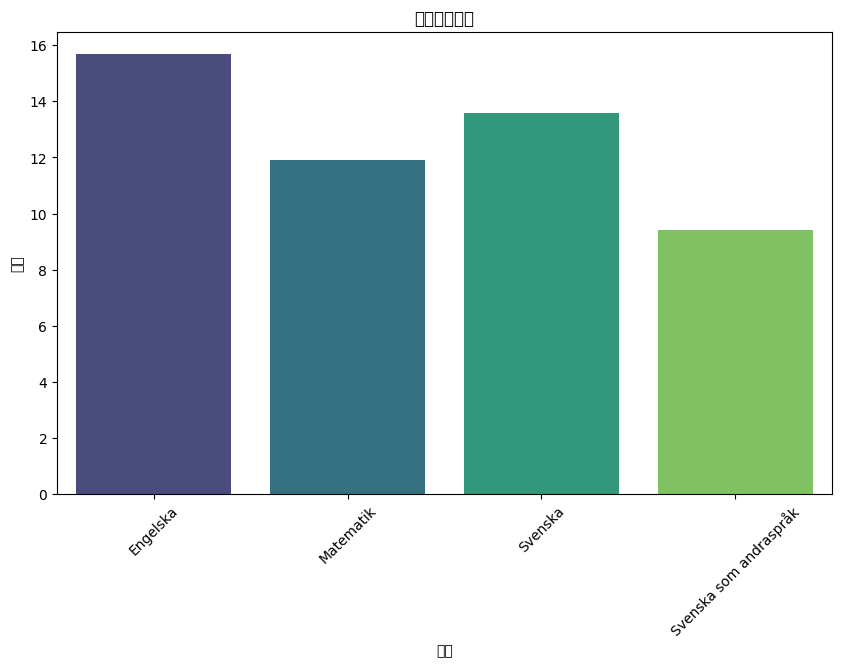

In [64]:
# 绘制柱状图
plt.figure(figsize=(10, 6))
sns.barplot(data=df_total_points, x="Subject", y="Total Points", palette="viridis")
plt.title("各科目的总分")
plt.xlabel("科目")          # 需要解决中文问题
plt.ylabel("总分")
plt.xticks(rotation=45)
plt.show()

# palette="viridis" 是在 Seaborn 绘图中 一个线性渐变色调色板，通常用于表示数据的连续性（color palette）
# plt.xticks(rotation=45) 调整 Matplotlib 图表 x 轴刻度标签显示角度的命令。它将 x 轴上的刻度标签旋转 45 度

#kokchun

total_points = {}
# {
# Engelska : ..., Matte: ..., Svenska: ...
# }

# matplotlib bar plot, x = keys, height = points

df_dict_cleaned["Engelska"].query("Huvudman == 'Samtliga'")["Totalt (poäng)"][0]

for subject in subjects:
    total_points[subject] = df_dict_cleaned[subject].query("Huvudman == 'Samtliga'")[
        "Totalt (poäng)"
    ][0]

total_points

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1)

ax.bar(total_points.keys(), total_points.values())
ax.set(
    xlabel="Ämne",
    ylabel="Genomsnitt betyg",
    title="Genomsnitt betyg för olika ämnen på nationella prov för samtliga huvudmän",
)

subjects[-1] = "SvA"
print(subjects)
ax.set_xticks(labels=subjects, ticks=range(len(subjects)))

**f) 更多探索性分析**

In [ ]:
# 1. 比较数学中男女生的总分
plt.figure(figsize=(8, 5))
sns.barplot(data=df_math, x="Huvudman", y="Totalt (poäng)", hue="Plats", palette="muted")
plt.title("数学：按学校类型和地区划分的总分")
plt.xlabel("学校类型")
plt.ylabel("总分")
plt.legend(title="地区", loc="upper right")
plt.show()

In [ ]:
# 2. 箱线图展示数学总分分布
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_math, x="Huvudman", y="Totalt (poäng)", palette="pastel")
plt.title("数学总分分布按学校类型划分")
plt.xlabel("学校类型")
plt.ylabel("总分")
plt.show()